# Student Performance Indicator

### Life Cycle of a ML project
1. Understanding Problem Statement
2. Data Collection
3. EDA- Exploratory data Analysis
4. Data Pre Processing
5. Model Training
6. Choose Best Model

## 1) Problem Statement
* This project understands how the student's performance(test scores) is affected by variables such as gender, Ethnicity, Parental level of Education, Lunch and Test Preparation course.

## 2) Data Collection
* Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 
* the data is enclosed in 8 columns and 1000 rows

### 2.1 Import data and Required Packages

Import Numpy, Pandas, Matplotlib, Seaborn and Warnings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv("E:\\Data Science\\ML Project1\\Notebook\\data\\StudentsPerformance.csv")

In [7]:
# see top 5 records

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# shape of dataset
df.shape

(1000, 8)

## 2.2 dataset info
* gender:(m/f)
* race/ethinicty: group(a,b,c,d,e)
* parental level of education: final education of parents
* lunch: having luch before testI(standard or free/reduced)
* test preparation course: complete/not complete before test
* math score 
* reading score 
* writing score

## 3. Data checks to perform
* check missing values
* check duplicates
* check data types
* check number of unique values in each column
* check statistics of the dataset
* check various categories present in categorical column

In [11]:
# 3.1 check missing values
''' handling missing values
Filling the missing data with the mean or median value if it's a numerical variable.
Filling the missing data with mode if it's a categorical value.
Filling the numerical value with 0 or -999, or some other number that will not occur in the data.'''


df.isna().sum()

# found no missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
# 3.2 check duplicates
'''use the drop_duplicates() function to remove duplicate rows. 
Optionally, specify subset columns to consider for duplicates'''
df.duplicated().sum()

#no duplicates found

np.int64(0)

In [13]:
# 3.3 check data types
'''object meand string wrt pandas'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
# 3.4 check unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
# 3.5 check statistics of dataset

df.describe()

''' we may clearly see that
1. mean of data are close i.e. of scores between 66 and 68.05
2. Standard deviations are also close bw 14.6 and 15.19
3. min and max of each score'''

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
# 3.7 exploring data

# define numerical and categorical columns
numeric_features=[i for i in df.columns if df[i].dtype!='O']
categorical_features=[i for i in df.columns if df[i].dtype=='O']

print(f'{len(numeric_features)} numerical features as: {numeric_features}')
print(f'{len(categorical_features)} categorical features as: {categorical_features}')

3 numerical features as: ['math score', 'reading score', 'writing score']
5 categorical features as: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [19]:
# 3.8 add columns for Total score and Average

df['total_score']=df['math score']+df['writing score']+df['reading score']
df['average']=df['total_score']/3

df.head()


# we may not need math score, reading score and writing score anymore.
# df.drop('math score',axis=1)  #uncomment to execute

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
# checking marks for certain conditions of children
# number of students with full marks
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f'reading full {reading_full}, writing full {writing_full}, math full {math_full}')

reading full 17, writing full 14, math full 7


In [25]:
# number of students with marks<20
reading_20=df[df['reading score']<20]['average'].count()
writing_20=df[df['writing score']<20]['average'].count()
math_20=df[df['math score']<20]['average'].count()
print(f'reading full {reading_20}, writing full {writing_20}, math full {math_20}')

reading full 1, writing full 3, math full 4


1. as above we may see that students have not performed well in maths
2. and have performed good in reading

## 4. Exploring data- visualisation

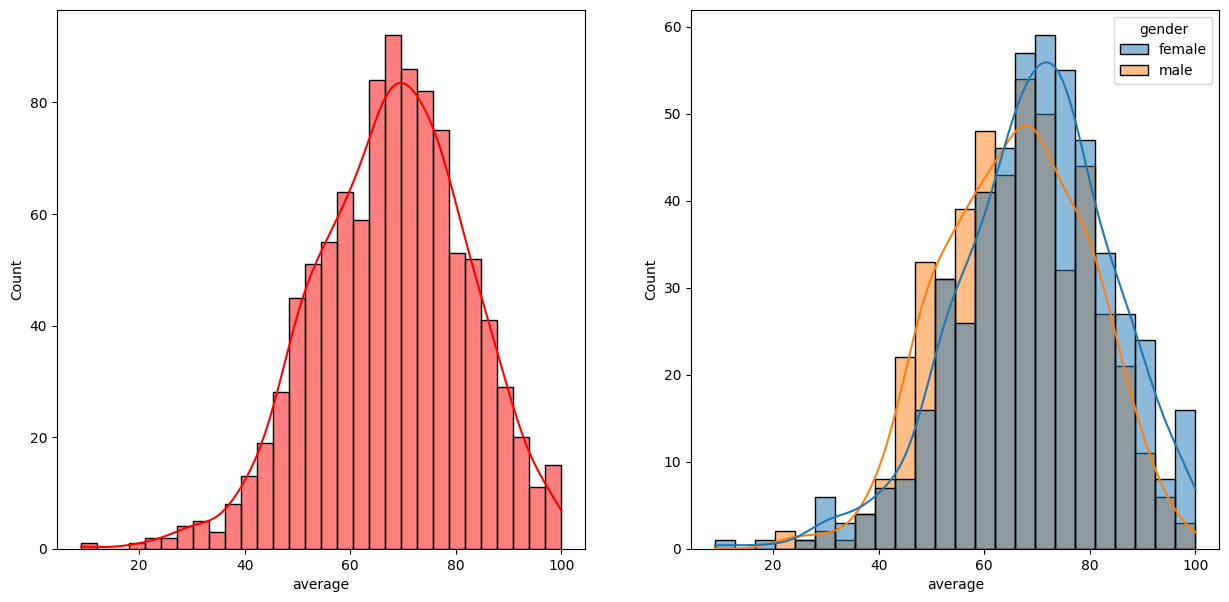

In [40]:
#4.1 Visualizing average score distribution to make conculsion
# using hiostogram and Kernel distribution function
'''Kernel density estimation is a way to estimate the probability density function (PDF) 
of a random variable in a non-parametric way.'''

fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
# axs is an array containing the Axes objects that correspond to the individual subplots

sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)

#bins=30: This sets the number of bins (intervals) in the histogram to 30.
#kde=True: This argument adds a KDE (Kernel Density Estimate) curve on top of the histogram, which smooths out 
#the histogram into a continuous probability density curve.
#121 is shorthand for a grid with 1 row, 2 columns, and activating the 1st subplot.
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

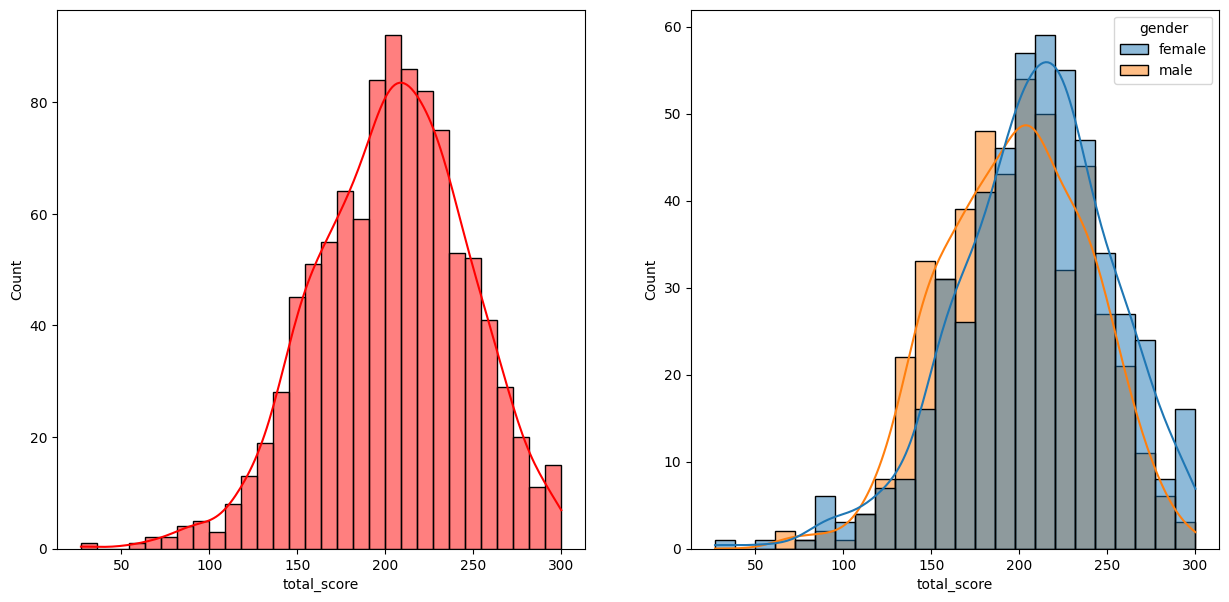

In [41]:
#find insights based on total, score
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

we may clearly see that there are less girls with lower marks and more girls with higher marks, this clearly shows us that girls score well in exams

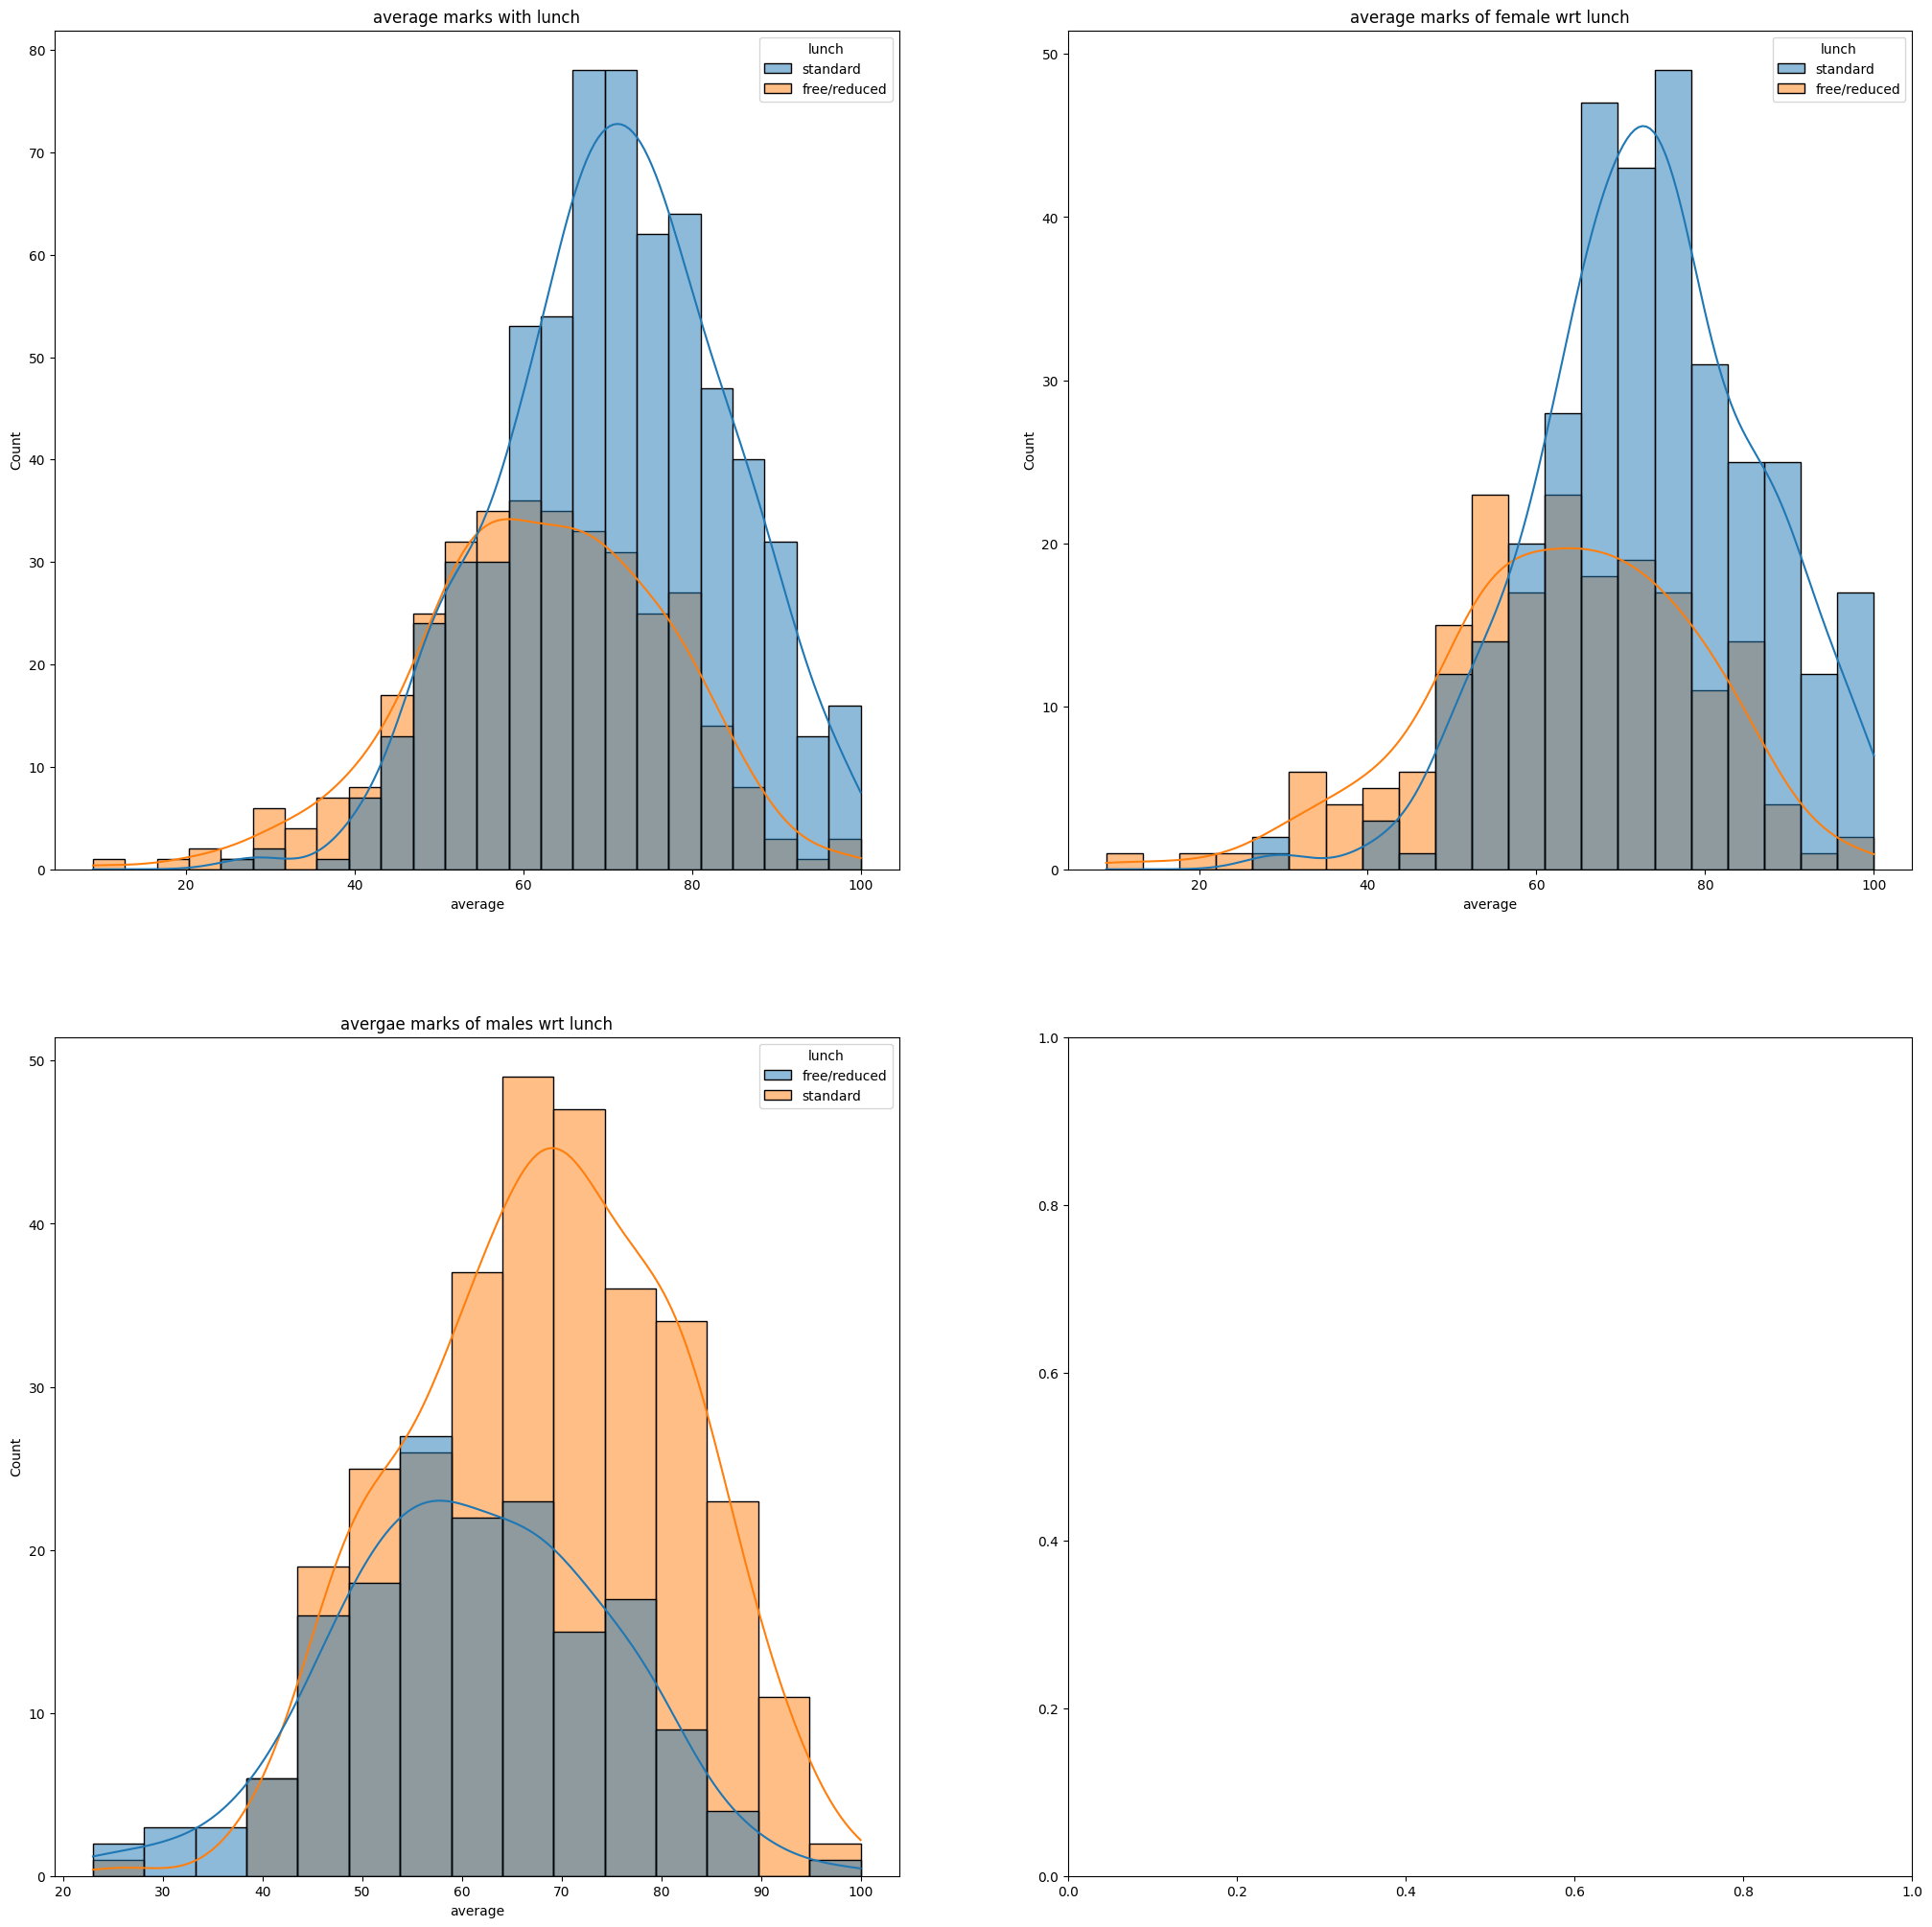

In [51]:
#find insights based on marks and their lunch
fig, axs=plt.subplots(2,2, figsize=(25,25))
plt.subplot(221)
plt.title('average marks with lunch')
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(222)
plt.title('average marks of female wrt lunch')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(223)
plt.title('avergae marks of males wrt lunch')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

standard lunch helps perform well in exams, either it be male or female

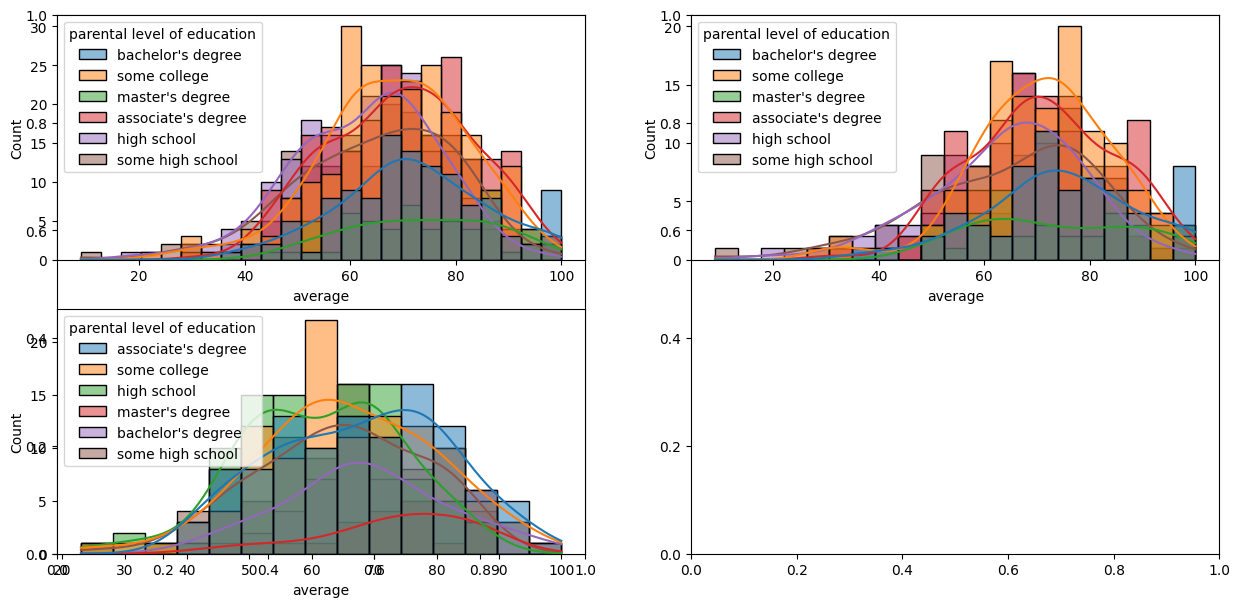

In [56]:
#find insights based on total, score
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(221)
sns.histplot(data=df,x='average', kde=True, hue='parental level of education')
plt.subplot(222)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(223)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

1. generally parenatal education does not help children
2. male children of degree holder parents perform well in exams
3. no effect on female children erspecive to parental education

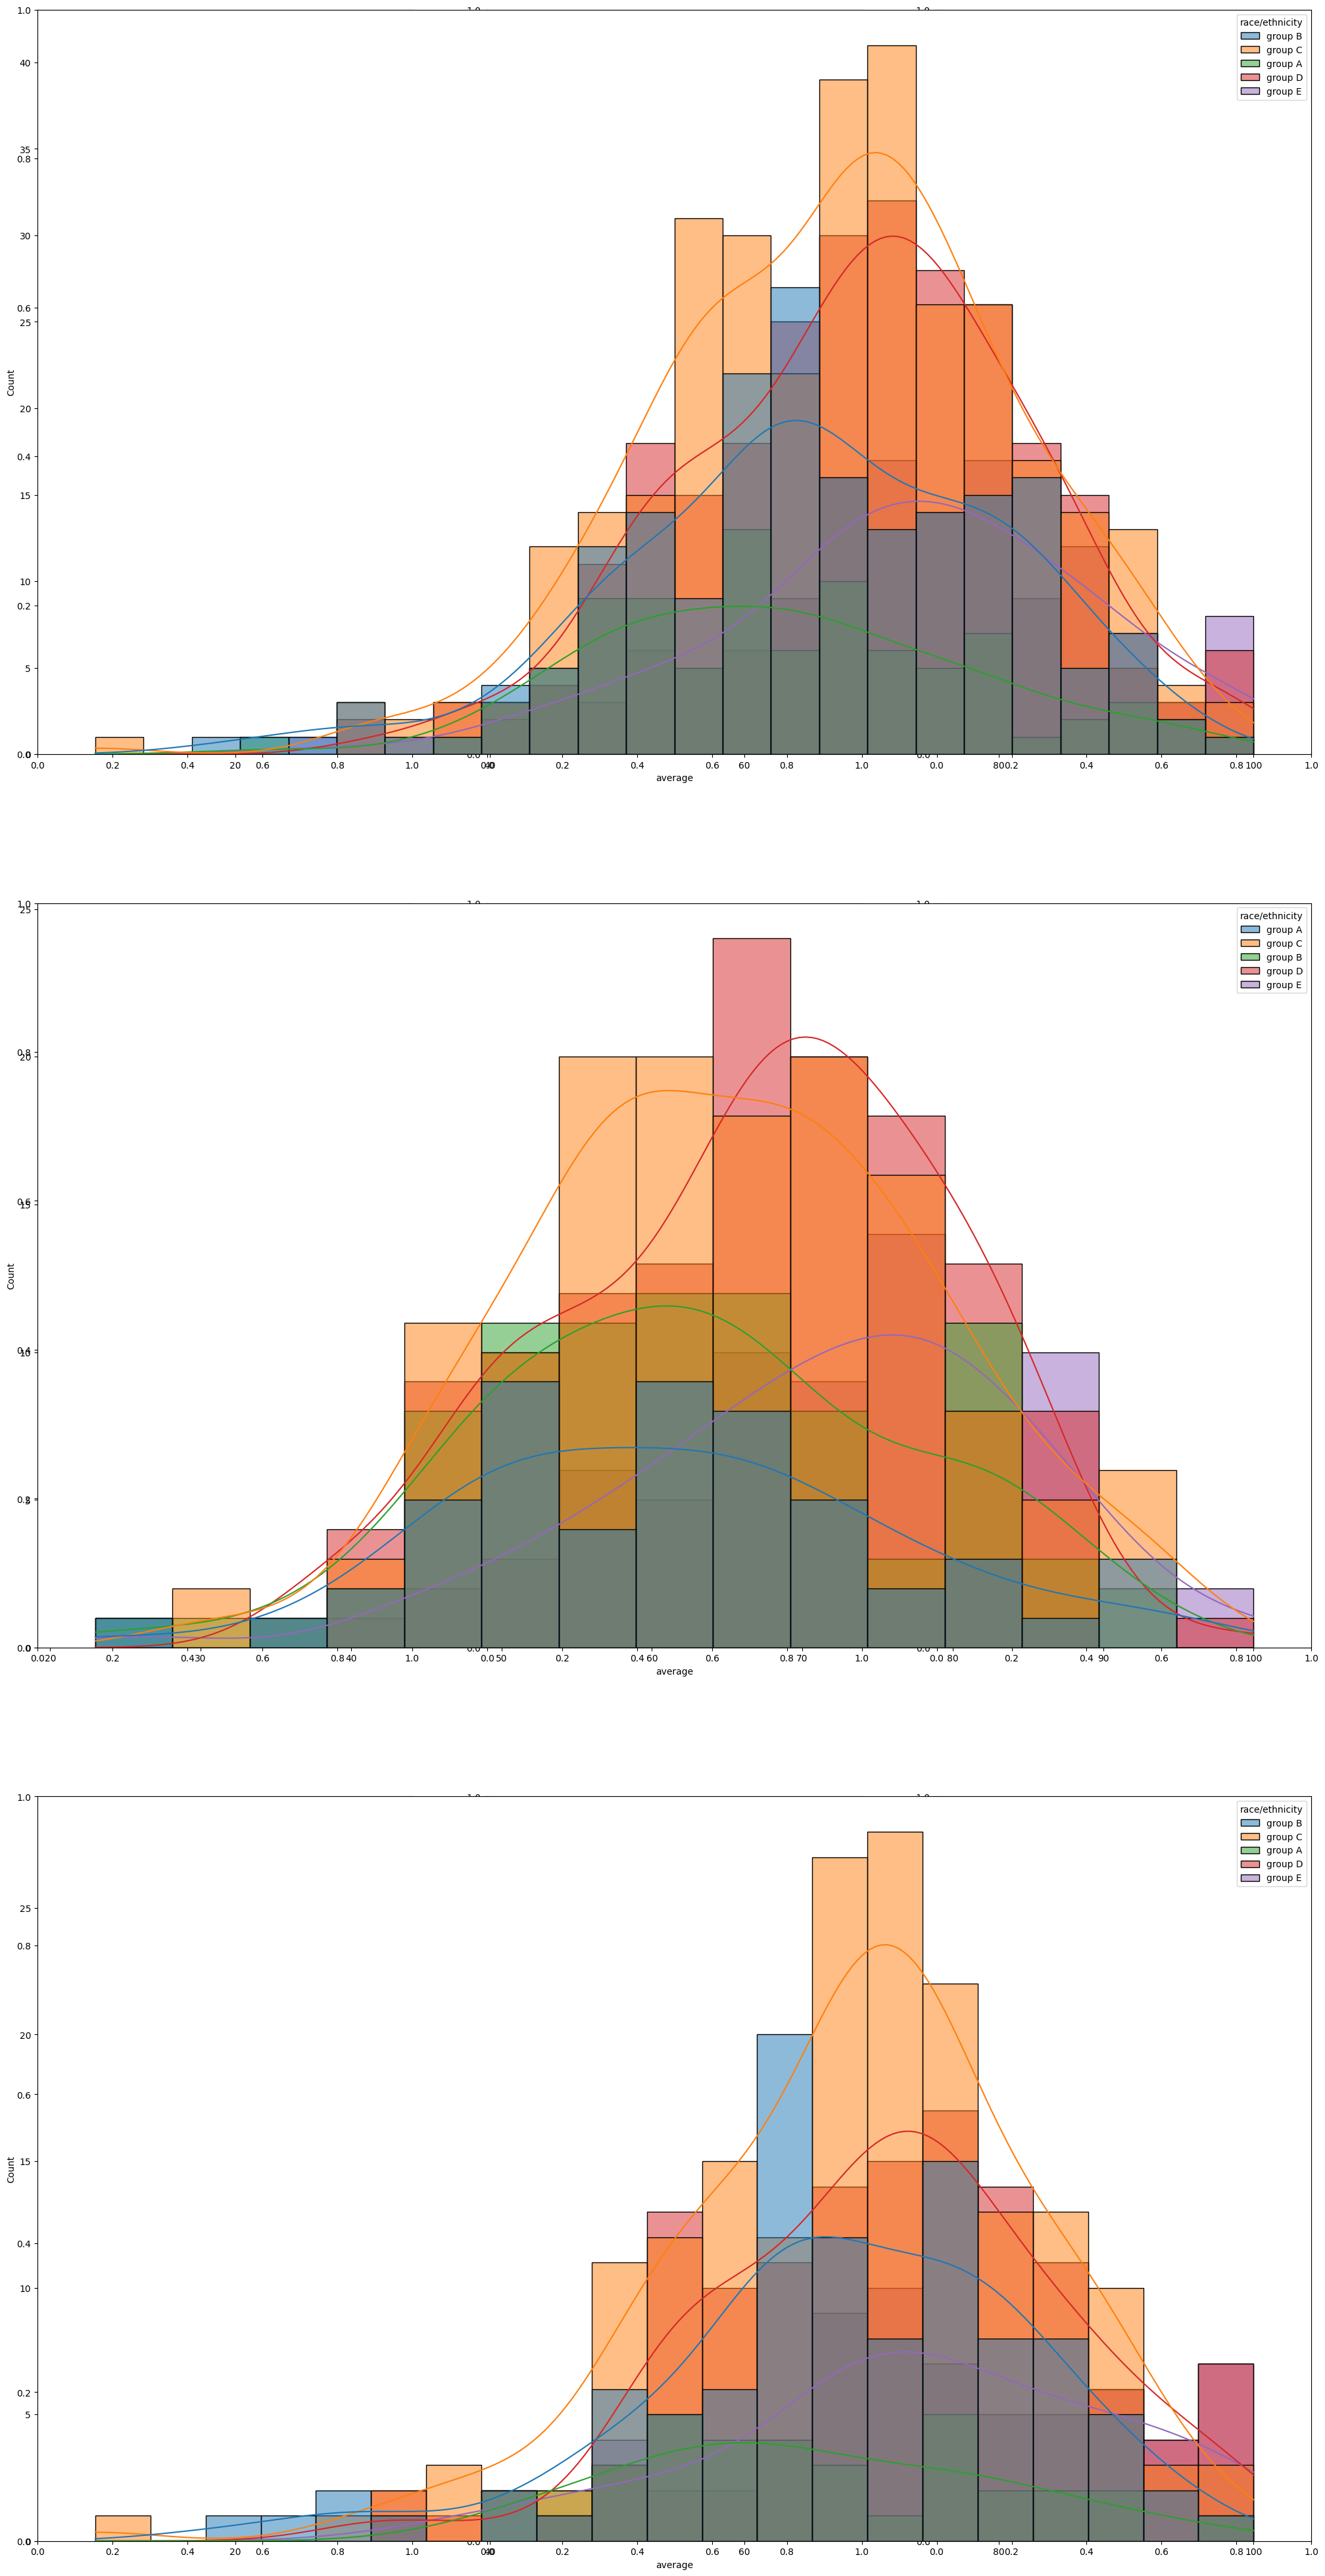

In [62]:

fig, axs=plt.subplots(3,3, figsize=(25,50))
plt.subplot(311)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(312)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(313)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show()

clearly group A and B didn't perform well, group c has a hgher score as depicteed above, moreover female of group b are quite better than males of gp B

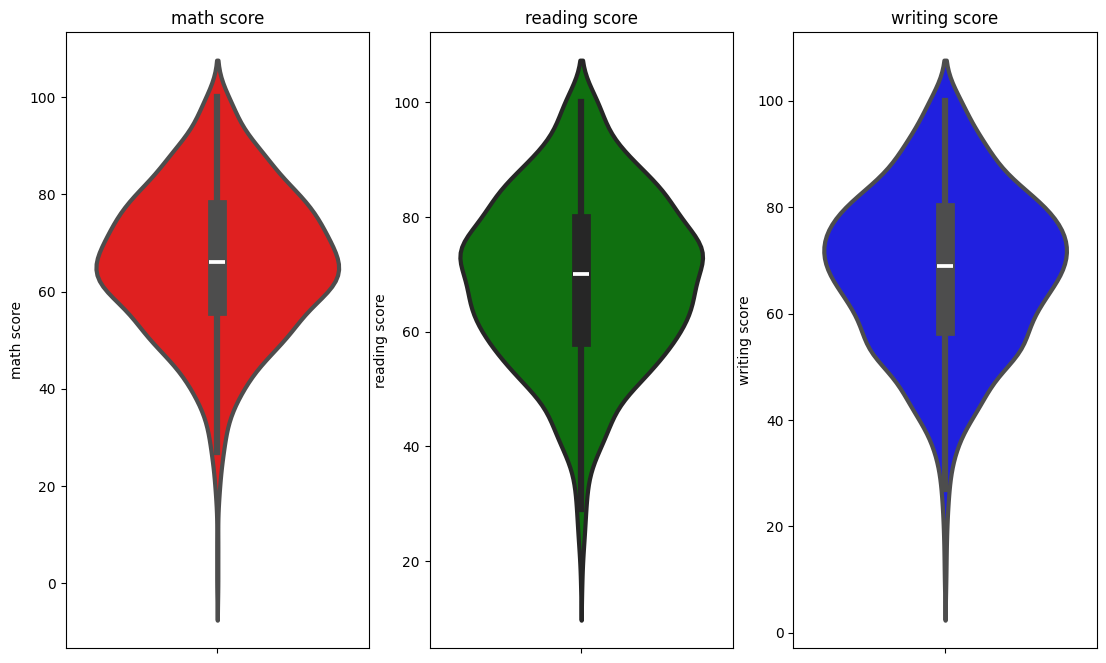

In [63]:
# 4.2 maximum scores of students in all three subjects

''' A violin plot is a hybrid of a box plot and a 
kernel density plot, which shows peaks in the data. 
It is used to visualize the distribution of numerical data. 
Unlike a box plot that can only show summary statistics, violin plots 
depict summary statistics and the density of each variable. '''

plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('math score')
sns.violinplot(data=df, y='math score', color='red',linewidth=3)

plt.subplot(1,4,2)
plt.title('reading score')
sns.violinplot(data=df, y='reading score',color='g',linewidth=3)

plt.subplot(1,4,3)
plt.title('writing score')
sns.violinplot(data=df,y='writing score',color='b',linewidth=3)

plt.show()

we may see that in case of maths, most stuents score a little more than 60 whereas in case of reading ait is evenly distriuted between 60 and 80, where as i writing higher are around 70

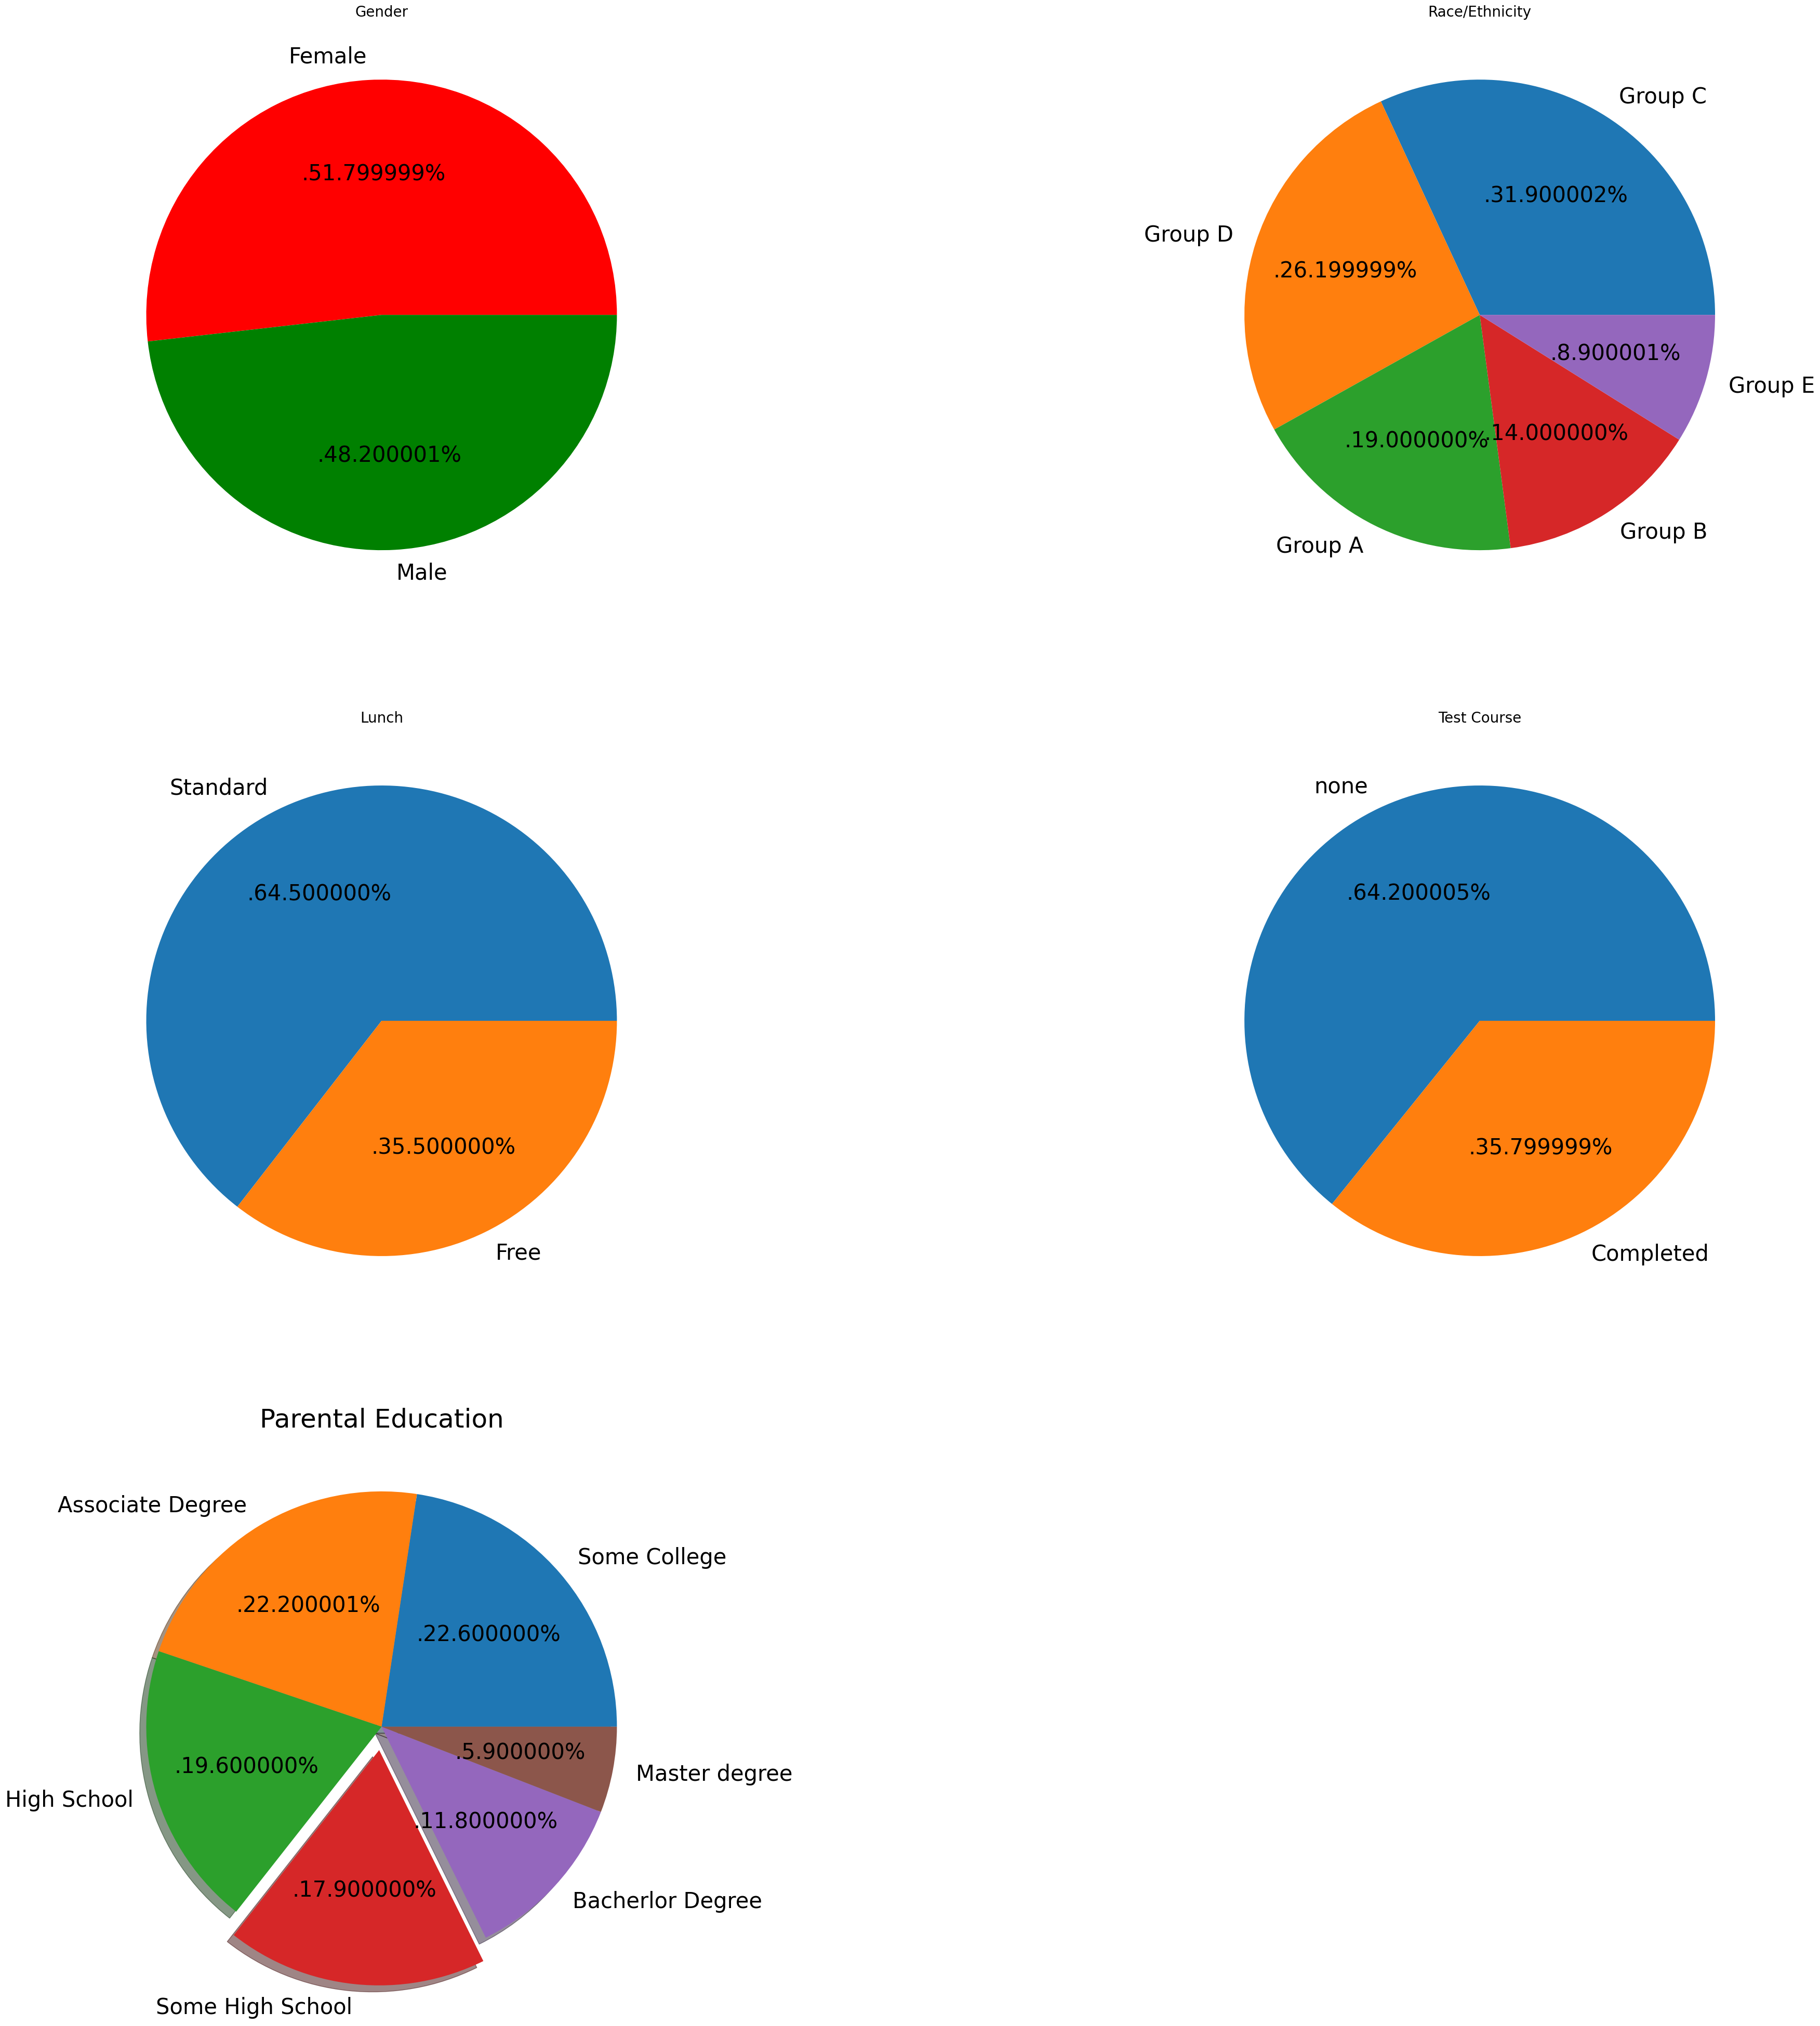

In [90]:
#4.3 multivariate analysis using piplot
''' Multivariate analysis refers to a set of statistical techniques used to 
analyze data that involves multiple variables simultaneously
multivariate analysis considers more complex relationships 
involving three or more variables.'''

plt.rcParams['font.size']=30
# plt.rcParams['figure.figsize']=(30,12)
plt.figure(figsize=(50,50))

plt.subplot(321)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')



plt.subplot(322)
labels='Group C', 'Group D','Group A','Group B','Group E'
plt.pie(df['race/ethnicity'].value_counts(),labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')


plt.subplot(323)
labels='Standard','Free'
plt.pie(df['lunch'].value_counts(),labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(324)
labels='none','Completed'
plt.pie(df['test preparation course'].value_counts(),labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(325)
labels='Some College','Associate Degree','High School','Some High School','Bacherlor Degree','Master degree'
plt.pie(df['parental level of education'].value_counts(),labels=labels,explode=[0,0,0,0.1,0,0],autopct='.%2f%%',shadow=True)
plt.title('Parental Education')
plt.axis('off')



# plt.tight_layout()
# plt.grid()
plt.show()

The above clearly gives a view of comparision between different values in the data set given, showing a concise view of number of various unique values in different atributes of a student

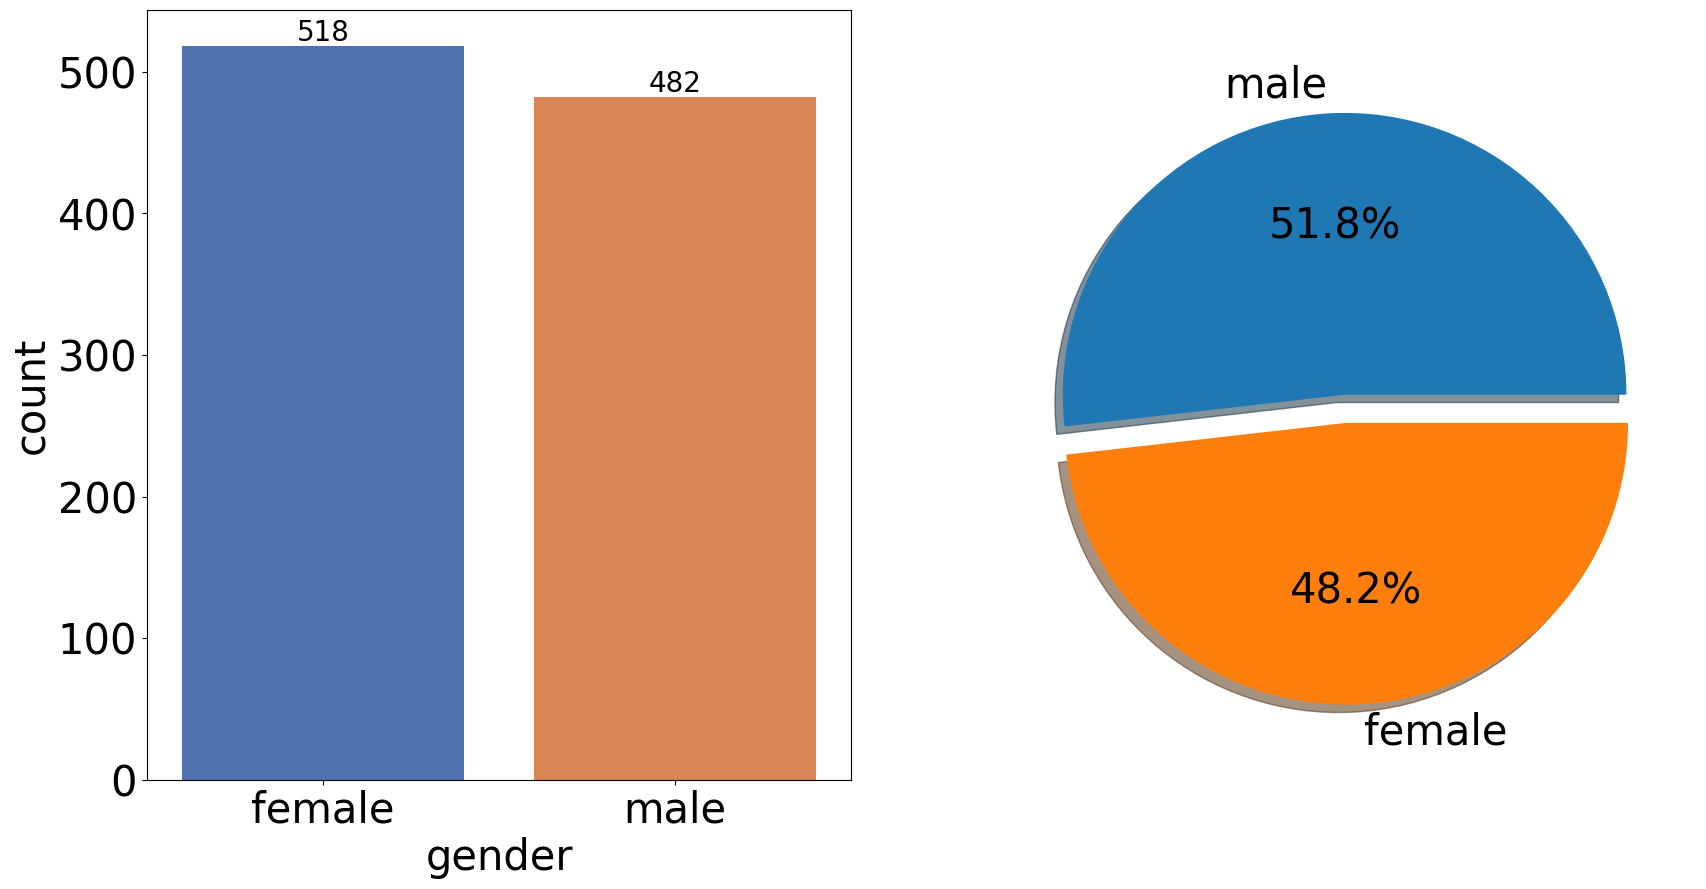

In [103]:
# 4.4 Feature Wise Visualisation
# 4.4.1 GENDER COLUMN
'''
what is te distribution of gender in students
is there any effect of gender on performance?
'''

#UNIVARIATE ANALYSIS - DISTRIBUTION OF GENDER

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='deep',ax=ax[0],saturation=0.95)
for i in ax[0].containers:
    ax[0].bar_label(i,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['male','female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

Gender data is almost balanced

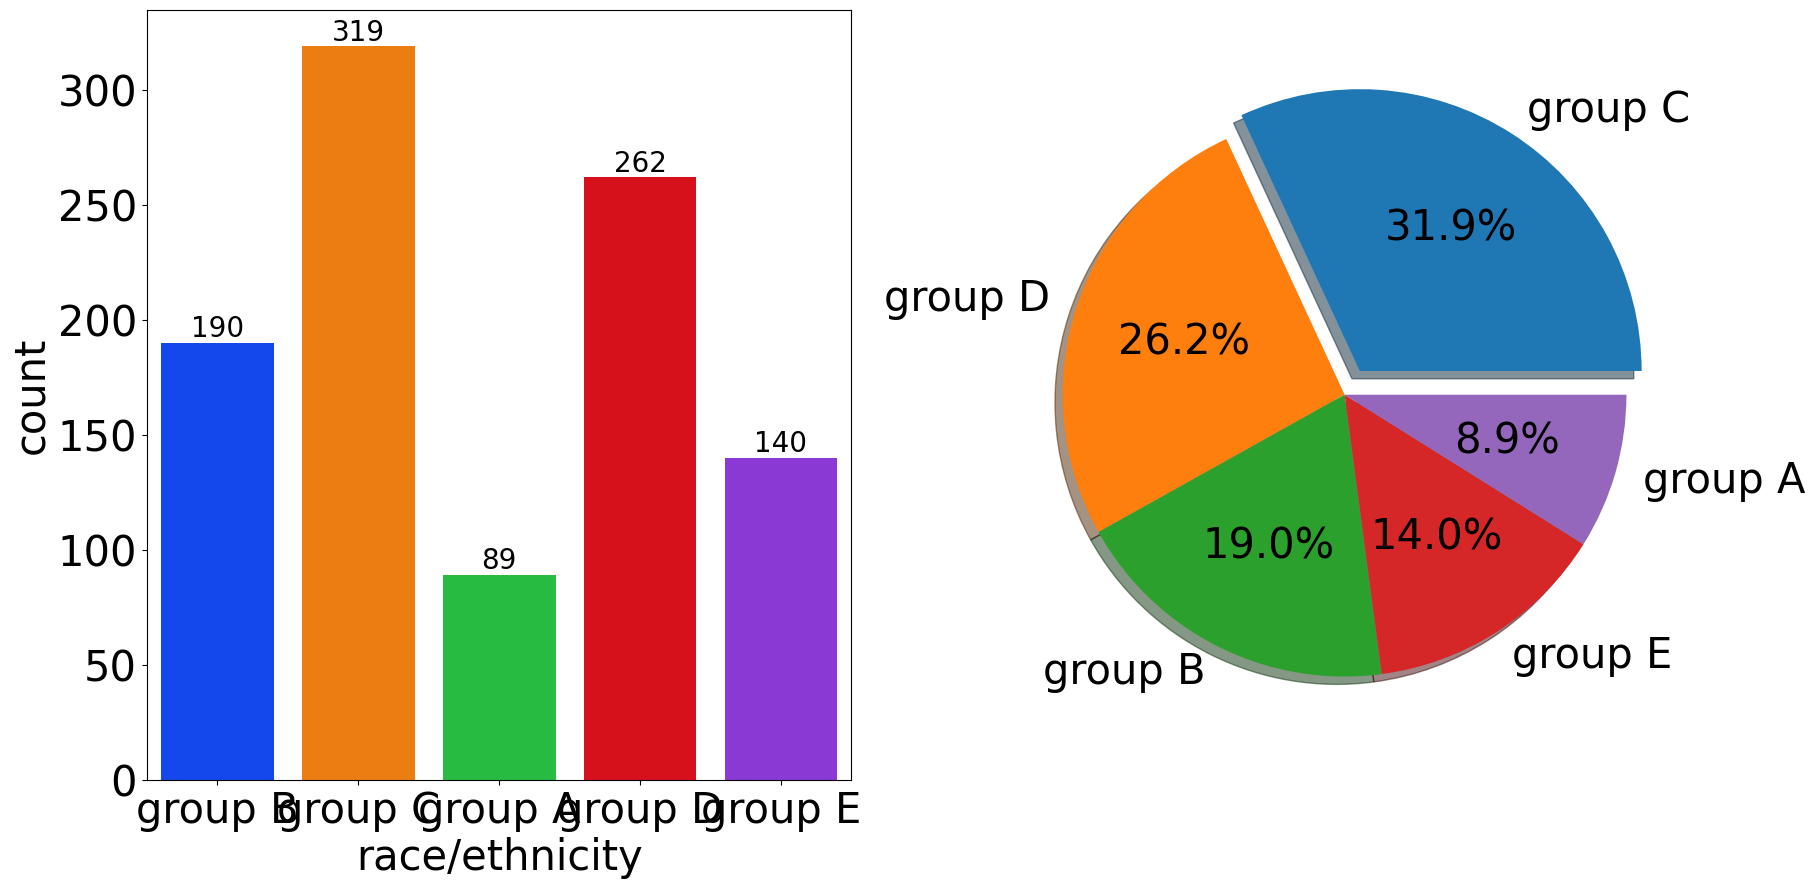

In [112]:
#4.4.2 Race/Ethnicity column
#how is Group wise distribution
#impact of race and ethnicity on peformance

#Univariate analysis

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.85)
for i in ax[0].containers:
    ax[0].bar_label(i,color='black',size=20)


plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

we may see that most of students are belonging to group C and D
lowest number of students belong to group A

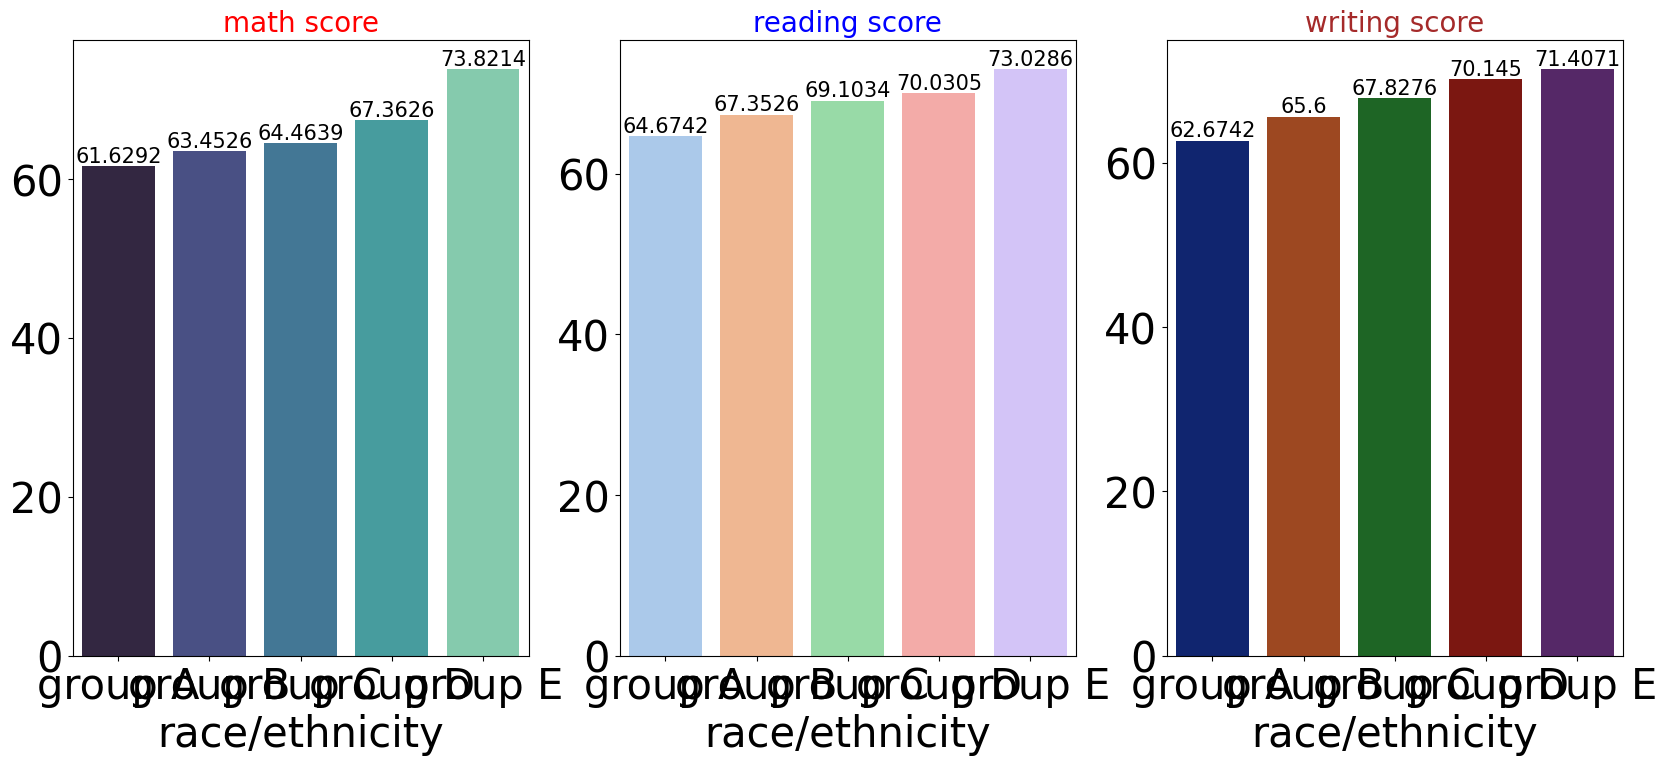

In [117]:
# Bivariate analysis - impact of race on performance


#math score with race
group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math score'].mean().index,y=group_data2['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('math score',color='red',size=20)

for i in ax[0].containers:
    ax[0].bar_label(i,color='black',size=15)



#reading score with race
sns.barplot(x=group_data2['reading score'].mean().index,y=group_data2['reading score'].mean().values,palette='pastel',ax=ax[1])
ax[1].set_title('reading score',color='blue',size=20)

for i in ax[1].containers:
    ax[1].bar_label(i,color='black',size=15)

# writing score with race
sns.barplot(x=group_data2['writing score'].mean().index,y=group_data2['writing score'].mean().values,palette='dark',ax=ax[2])
ax[2].set_title('writing score',color='brown',size=20)

for i in ax[2].containers:
    ax[2].bar_label(i,color='black',size=15)




clearly students of group E are more intelligent and score well in exams, whereas children in group A are por in learning

students from lower socioeconomic stsus have scored less

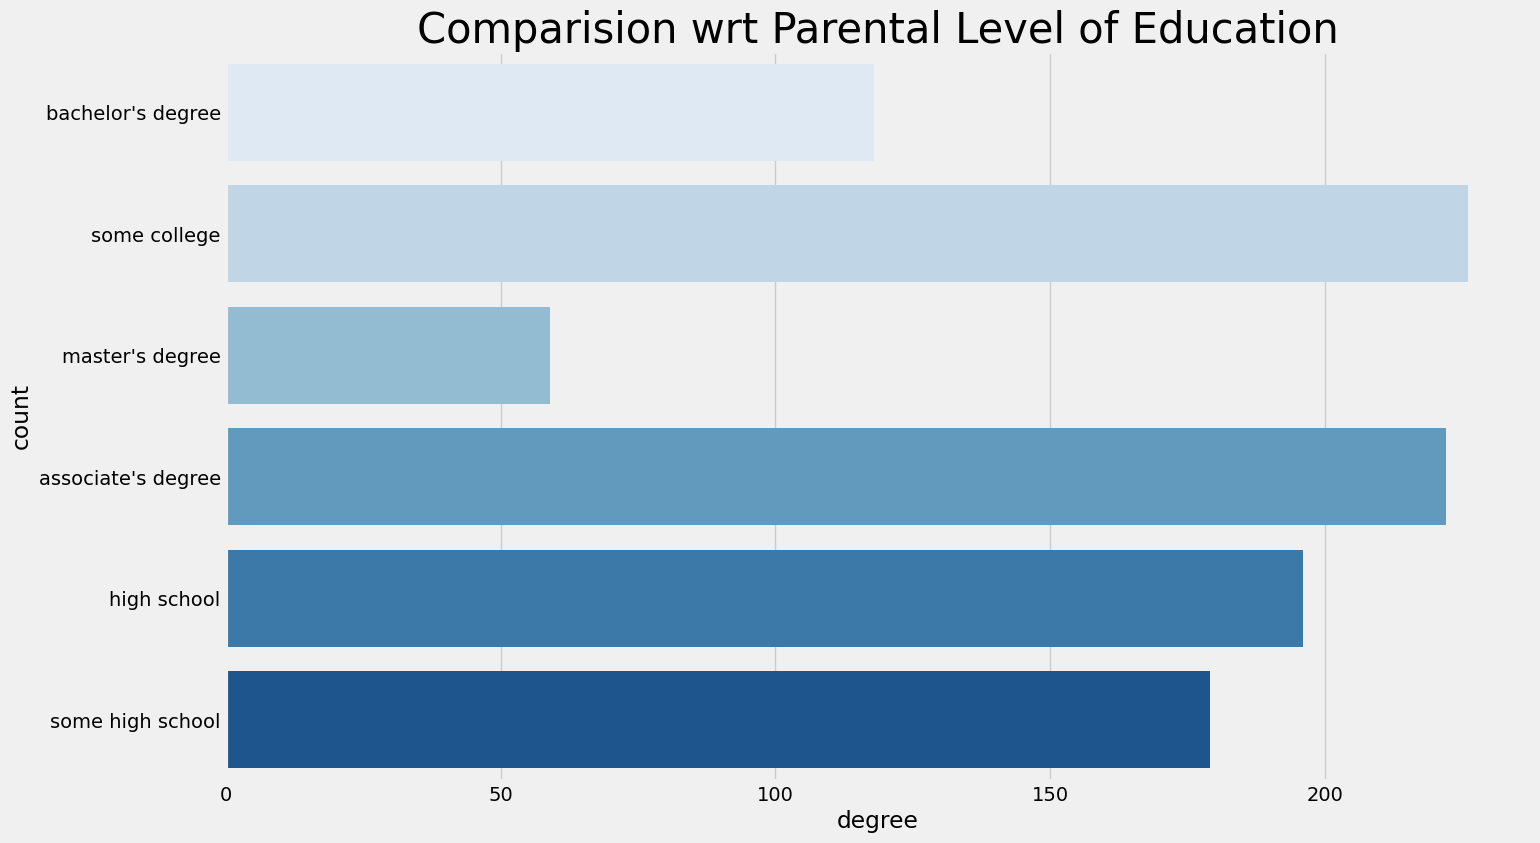

In [118]:
#4.4.3 parental level of education
# waht is background and what is impact?

#univariate analysis, what ist eh educational background

plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Comparision wrt Parental Level of Education',fontweight=30,fontsize=30,)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()


very less parents have a master's degree and many of them have b een to some college 

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

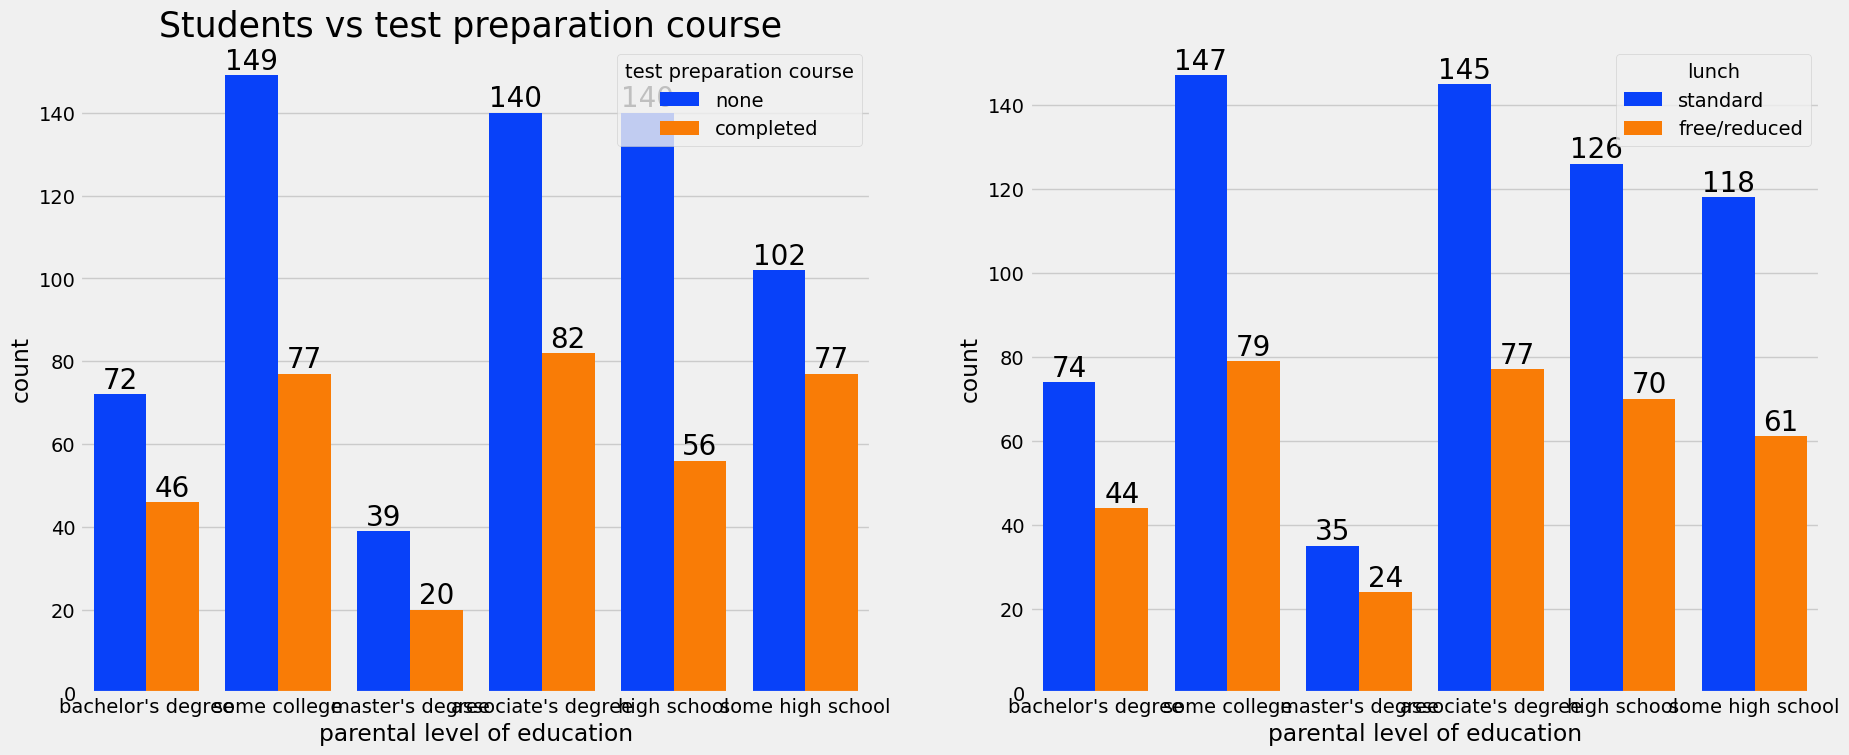

In [128]:
#4.4.4 effect of meal

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

students with standard lnch have goofd results

<Axes: xlabel='lunch', ylabel='writing score'>

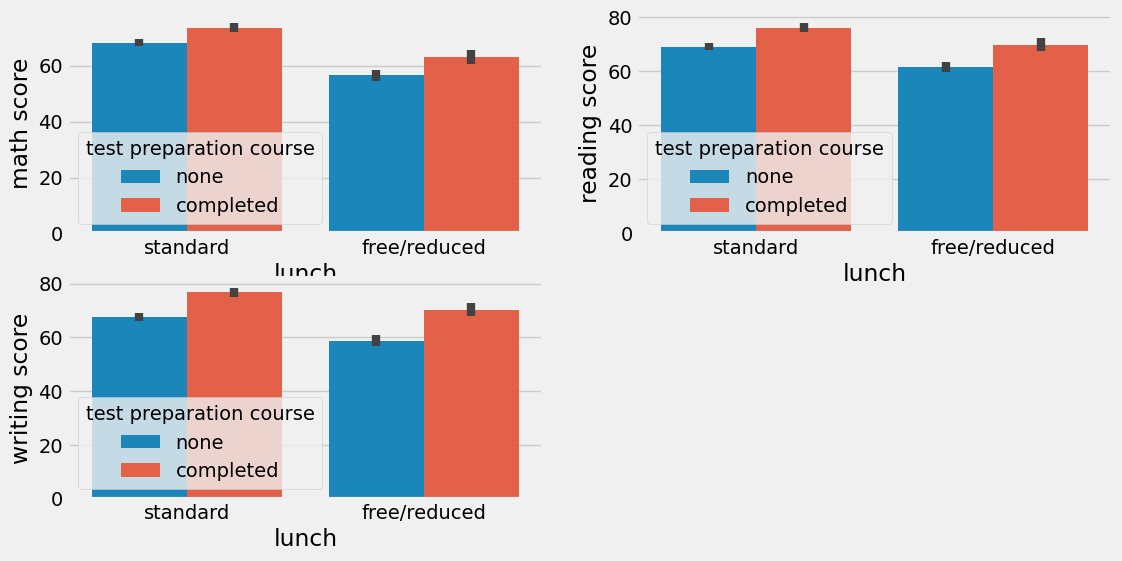

In [127]:
#4.4.5 Test preparation
#which meal is taken among students
#does it affects results



plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

ones who had completed the course have better performance

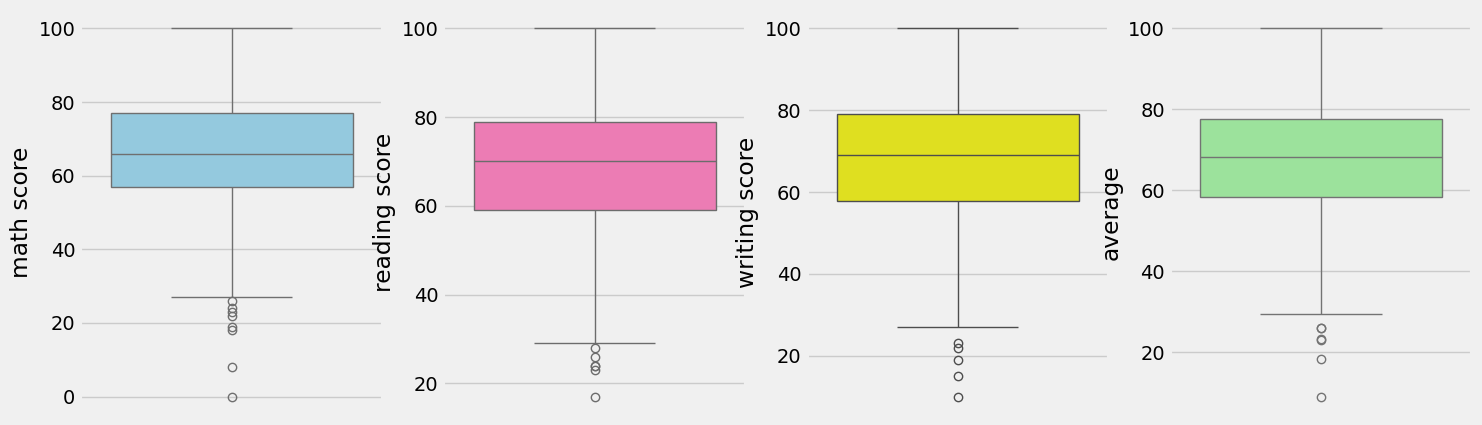

In [131]:
#4.4.6 Checking outliers

plt.subplots(1,4,figsize=(16,5))

plt.subplot(1,4,1)
sns.boxplot(df['math score'],color='skyblue')

plt.subplot(1,4,2)
sns.boxplot(df['reading score'],color='hotpink')

plt.subplot(1,4,3)
sns.boxplot(df['writing score'],color='yellow')

plt.subplot(1,4,4)
sns.boxplot(df['average'],color='lightgreen')

plt.show()

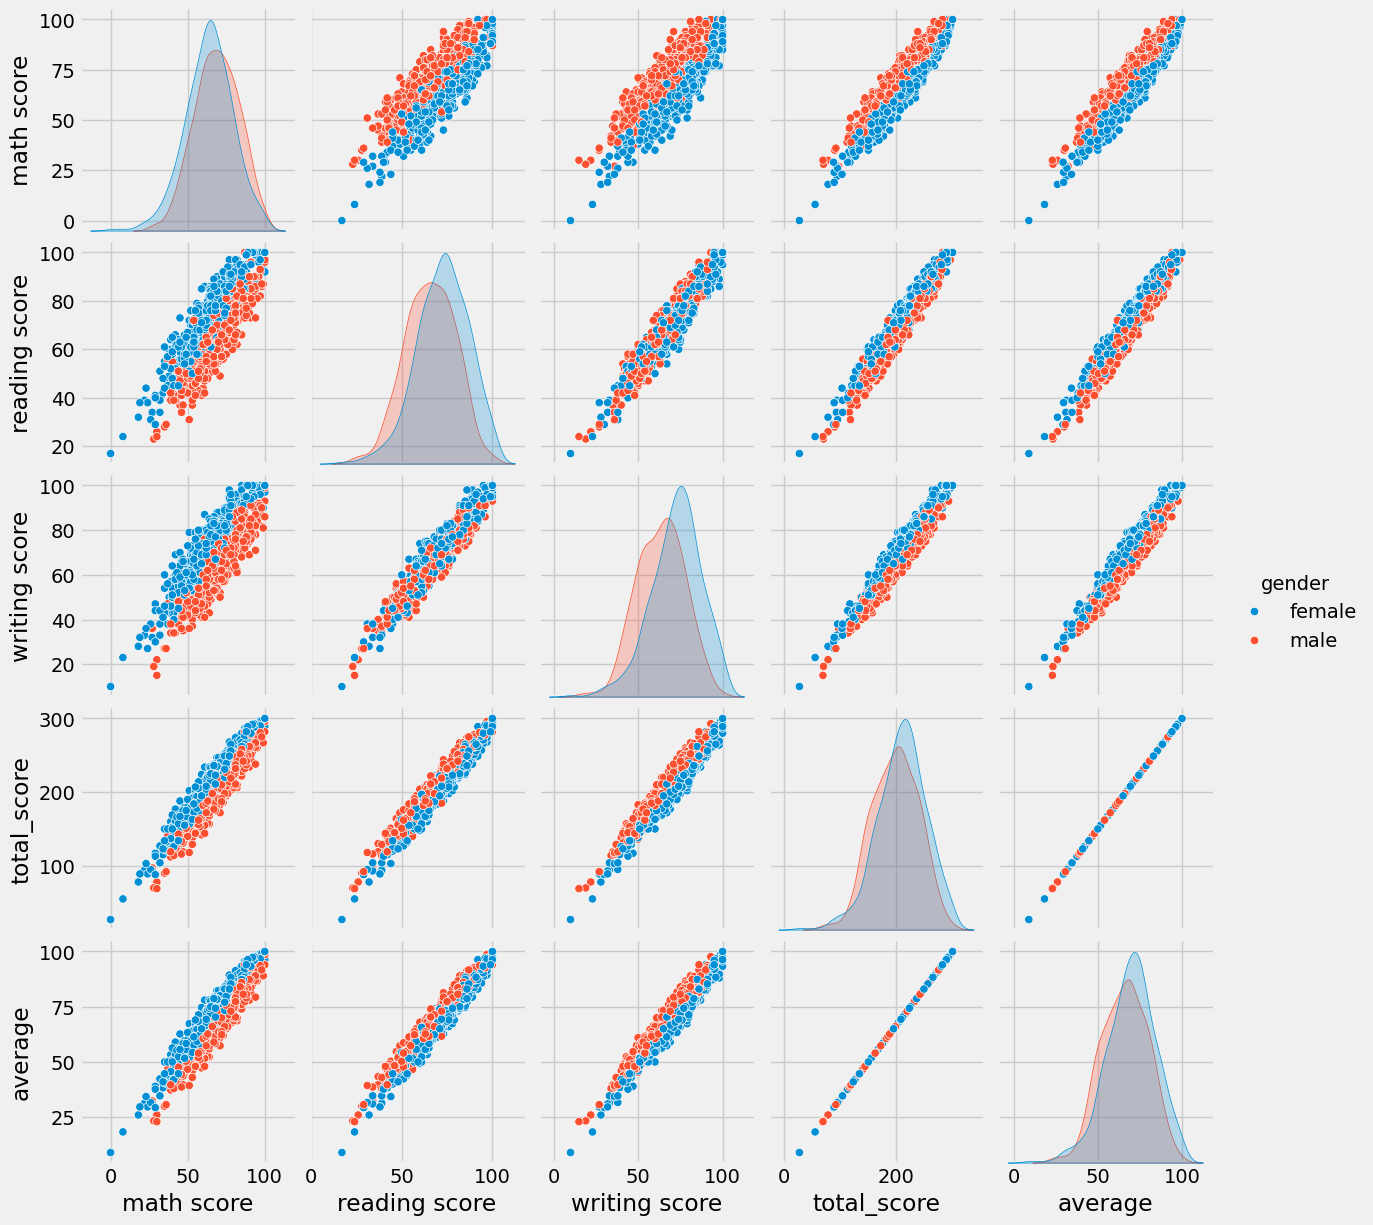

In [132]:
# multivariate anaysis using pairplot

sns.pairplot(df,hue='gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is beneficial.